# **1. Perkenalan Dataset**


📝 Deskripsi Dataset: Early Stage Diabetes Risk Prediction

Sumber: UCI Machine Learning Repository (ID: 529)

Dataset ini berisi data tanda dan gejala dari pasien yang baru terdiagnosis diabetes atau memiliki risiko diabetes. Data dikumpulkan menggunakan kuesioner langsung dari pasien di Rumah Sakit Diabetes Sylhet di Sylhet, Bangladesh.

Informasi Atribut:

1. Age
2. Gender: Male (Laki-laki), Female (Perempuan).
3. Polyuria: Apakah pasien mengalami buang air kecil berlebih? (Yes/No).
4. Polydipsia: Apakah pasien mengalami rasa haus berlebih? (Yes/No).
5. Sudden Weight Loss: Penurunan berat badan secara tiba-tiba? (Yes/No).
6. Weakness: Apakah pasien merasa lemah? (Yes/No).
7. Polyphagia: Apakah pasien mengalami nafsu makan berlebih? (Yes/No).
8. Genital Thrush: Infeksi jamur pada area genital? (Yes/No).
9. Visual Blurring: Pandangan kabur? (Yes/No).
10. Itching: Apakah pasien merasa gatal-gatal? (Yes/No).
11. Irritability: Apakah pasien mudah marah? (Yes/No).
12. Delayed Healing: Luka yang lama sembuh? (Yes/No).
13. Partial Paresis: Kelumpuhan otot sebagian? (Yes/No).
14. Muscle Stiffness: Kekakuan otot? (Yes/No).
15. Alopecia: Kerontokan rambut? (Yes/No).
16. Obesity: Apakah pasien mengalami obesitas? (Yes/No).
17. Class: Target (Positive/Negative).

Tujuan Eksperimen:
Melakukan klasifikasi risiko diabetes pada tahap awal menggunakan algoritma Machine Learning (XGBoost) berdasarkan gejala-gejala klinis di atas.

# **2. Import Library**

In [1]:
!pip install ucimlrepo

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from IPython.display import display

# **3. Memuat Dataset**

In [3]:
# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

In [4]:
print("Features (X):")
display(X)

print("Targets (y):")
display(y)

Features (X):


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No


Targets (y):


,class
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
515,Positive
516,Positive
517,Positive
518,Negative


In [17]:
# metadata
print(early_stage_diabetes_risk_prediction.metadata)

# variable information
print(early_stage_diabetes_risk_prediction.variables)

{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

Terlihat bahwa dataset berisi 520 baris data dengan mayoritas tipe datanya adalah Binary dan tidak memiliki missing value

# **4. Exploratory Data Analysis (EDA)**


In [7]:
df = pd.concat([X, y], axis=1)

/tmp/ipython-input-10-3619226662.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='viridis')


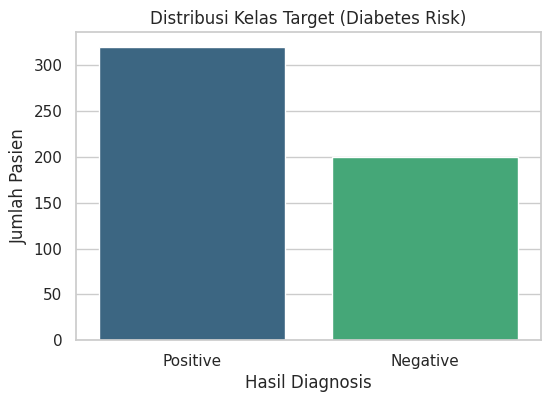

In [10]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribusi Kelas Target (Diabetes Risk)')
plt.xlabel('Hasil Diagnosis')
plt.ylabel('Jumlah Pasien')
plt.show()



Analisis pada distribusi kelas target menunjukkan bahwa dataset ini memiliki keseimbangan yang cukup baik antara pasien yang terdiagnosis positif dan negatif. Meskipun jumlah pasien dengan risiko positif sedikit lebih dominan, proporsinya tidak menunjukkan ketimpangan ekstrem yang dapat menyebabkan bias pada model klasifikasi. Kondisi ini memungkinkan algoritma Machine Learning untuk mempelajari karakteristik dari kedua kelompok secara adil, sehingga evaluasi akurasi nantinya akan memberikan gambaran performa yang lebih objektif terhadap data baru.

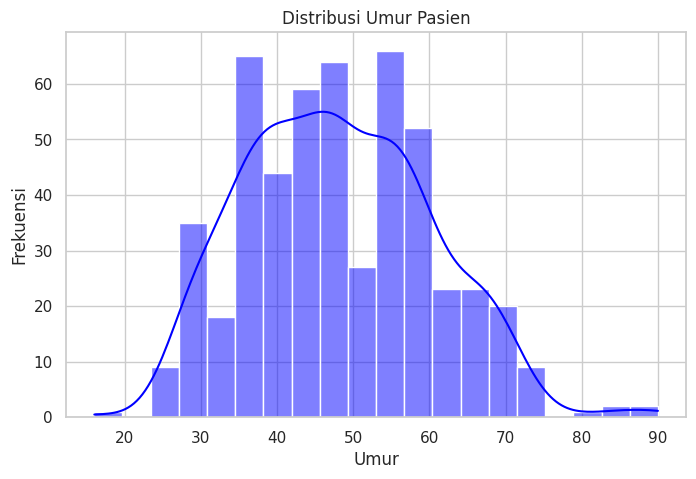

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Tinjauan terhadap distribusi umur mengungkapkan bahwa sebagian besar subjek penelitian berada dalam rentang usia produktif hingga lansia, dengan konsentrasi massa data berada pada rentang empat puluh hingga enam puluh tahun. Pola ini divalidasi oleh garis estimasi kepadatan kernel yang menunjukkan puncak frekuensi di usia paruh baya, yang secara medis memang merupakan kelompok usia dengan risiko diabetes tipe dua yang lebih tinggi. Informasi ini memberikan konteks penting bagi model bahwa faktor umur merupakan variabel numerik yang memiliki pengaruh signifikan terhadap profil risiko pasien.

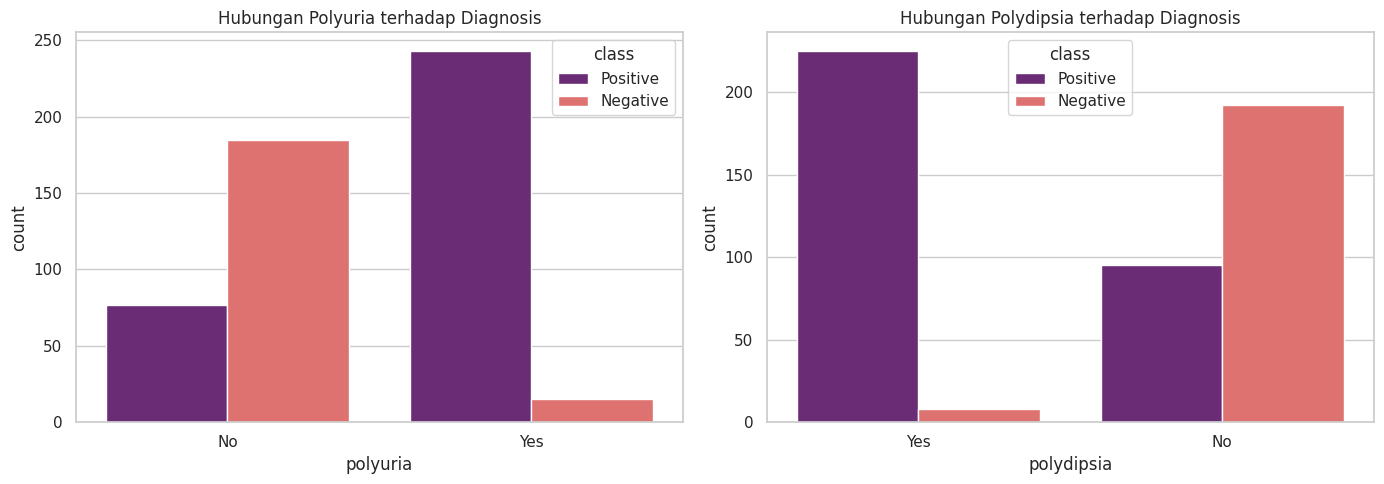

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='polyuria', hue='class', ax=ax[0], palette='magma')
ax[0].set_title('Hubungan Polyuria terhadap Diagnosis')

sns.countplot(data=df, x='polydipsia', hue='class', ax=ax[1], palette='magma')
ax[1].set_title('Hubungan Polydipsia terhadap Diagnosis')

plt.tight_layout()
plt.show()

Visualisasi hubungan antara gejala klinis dengan diagnosis mempertegas dominasi gejala Polyuria dan Polydipsia sebagai prediktor utama. Terlihat secara kontras bahwa pasien yang menjawab "Ya" pada kedua gejala tersebut hampir seluruhnya tergolong dalam kelas positif, sementara pasien tanpa gejala tersebut memiliki kecenderungan tinggi untuk tergolong negatif. Konsistensi pola ini memvalidasi mengapa fitur-fitur tersebut nantinya akan memiliki nilai penting yang tinggi (feature importance) saat diproses oleh algoritma XGBoost setelah melewati tahap transformasi data biner.

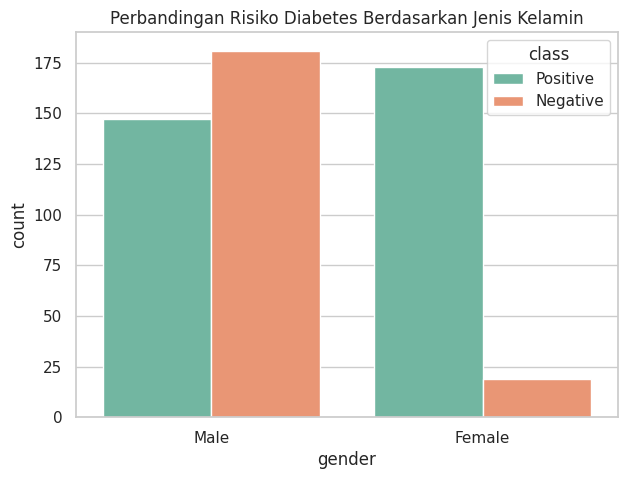

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='gender', hue='class', palette='Set2')
plt.title('Perbandingan Risiko Diabetes Berdasarkan Jenis Kelamin')
plt.show()

Perbandingan risiko berdasarkan jenis kelamin memberikan wawasan tambahan bahwa terdapat perbedaan prevalensi yang nyata antara pria dan wanita dalam dataset ini. Distribusi menunjukkan bahwa kelompok wanita dalam sampel ini memiliki proporsi diagnosis positif yang jauh lebih tinggi dibandingkan kelompok pria. Temuan ini menegaskan pentingnya menyertakan fitur gender dalam pelatihan model karena terdapat korelasi spesifik antara jenis kelamin dengan kecenderungan munculnya gejala-gejala diabetes yang telah direkam.



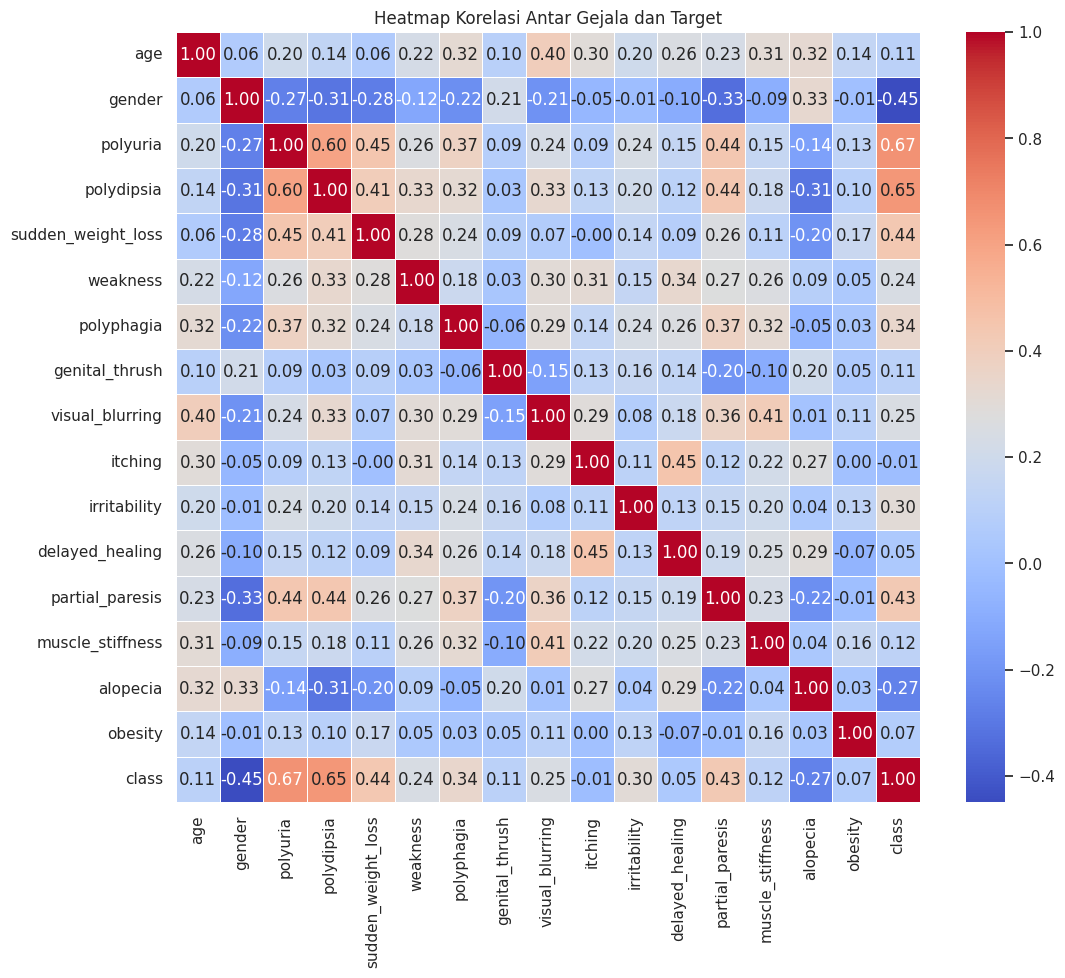

In [16]:
df_temp = df.copy()
for col in df_temp.columns:
    if df_temp[col].dtype == 'object':
        df_temp[col] = df_temp[col].astype('category').cat.codes

plt.figure(figsize=(12, 10))
sns.heatmap(df_temp.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Gejala dan Target')
plt.show()

Terakhir, analisis heatmap korelasi memberikan bukti matematis yang memperkuat seluruh temuan visual sebelumnya. Kolom target menunjukkan korelasi positif yang sangat kuat dengan fitur-fitur biner hasil transformasi gejala klinis, yang berarti keberadaan gejala tersebut berbanding lurus dengan kenaikan probabilitas risiko diabetes. Melalui angka-angka korelasi ini, kita dapat memvalidasi bahwa langkah preprocessing seperti penggunaan get_dummies pada fitur kategorikal dan LabelEncoder pada variabel target adalah keputusan yang tepat untuk mempertahankan integritas hubungan antar variabel selama fase pemodelan dilakukan.

# **5. Data Preprocessing**

Preprocessing dengan get_dummies dan LabelEncoder untuk mempertahankan integritas hubungan antar variabel

In [15]:
X_encoded = pd.get_dummies(X, drop_first=True)
print("Encoded Features (X_encoded):")
display(X_encoded.head())

# Label encode the target variable y
le = LabelEncoder()
y_encoded = pd.DataFrame(le.fit_transform(y.iloc[:, 0]), columns=['class'])
print("Encoded Target (y_encoded):")
display(y_encoded.head())

Encoded Features (X_encoded):


,age,gender_Male,polyuria_Yes,polydipsia_Yes,sudden_weight_loss_Yes,weakness_Yes,polyphagia_Yes,genital_thrush_Yes,visual_blurring_Yes,itching_Yes,irritability_Yes,delayed_healing_Yes,partial_paresis_Yes,muscle_stiffness_Yes,alopecia_Yes,obesity_Yes
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True


Encoded Target (y_encoded):


,class
0,1
1,1
2,1
3,1
4,1
